In [117]:
import os
import time
import torch
from PIL import Image
from sklearn.metrics import accuracy_score
import torch.onnx
import onnxruntime
import onnx
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from matplotlib.pyplot import imshow
from IPython.display import display

In [118]:
# Путь к нашим исходным весам.
path_to_weights = "best.pt"

# Загрузим веса в модель.
model = torch.hub.load('ultralytics/yolov5', 'custom', autoshape=False, path=path_to_weights)

Using cache found in C:\Users\allbe/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-10-16 Python-3.11.4 torch-2.0.1 CPU



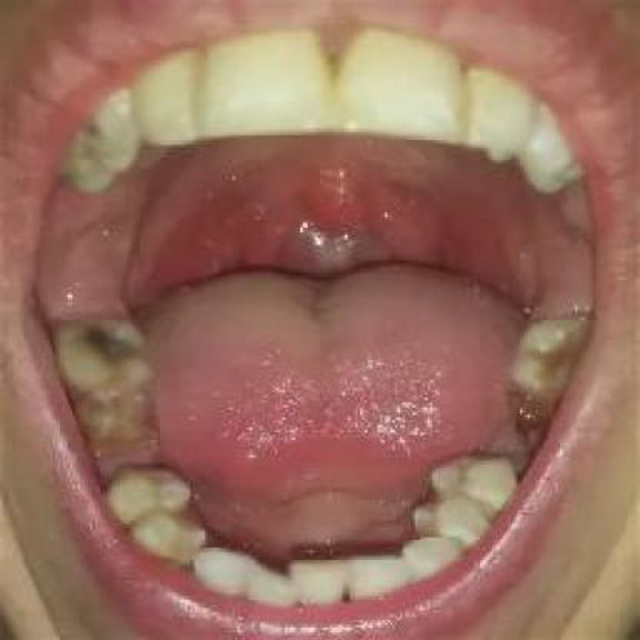

In [123]:
image = Image.open("test_image6.jpg", mode='r', formats=None)
image = image.resize((640, 640))

display(image)

In [124]:
input_image = torch.unsqueeze(torch.tensor(np.array(image)), 0).float()
input_image = torch.reshape(input_image, (input_image.shape[0], input_image.shape[3], input_image.shape[1], input_image.shape[2]))

print(input_image.shape)

torch.Size([1, 3, 640, 640])


In [125]:
# конвертируем нашу модель в ONNX.
torch.onnx.export(model,               # model being run
                  input_image,                         # model input (or a tuple for multiple inputs)
                  "yolo5/yolo5.onnx",   # where to save the model (can be a
                  # file
                  # or file-like object)
                  export_params=True,        # store the trained parameter weights inside the model file
                  opset_version=11,          # the ONNX version to export
                  # the model to
                  do_constant_folding=True,  # whether to execute constant folding for optimization
                  input_names = ['input'],   # the model's input names
                  output_names = ['output'], # the model's output names
                  dynamic_axes={'input' : {0 : 'batch_size'},    # variable length axes
                                'output' : {0 : 'batch_size'}})

C:\Users\allbe/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:527: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  y = self.model(im, augment=augment, visualize=visualize) if augment or visualize else self.model(im)
C:\Users\allbe/.cache\torch\hub\ultralytics_yolov5_master\models\yolo.py:64: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if self.dynamic or self.grid[i].shape[2:4] != x[i].shape[2:4]:


================ Diagnostic Run torch.onnx.export version 2.0.1 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [126]:
# Путь к сохраненным в ONNX весам.
onnx_weights = "yolo5/yolo5.onnx"

# Загрузим наши веса.
model_onnx = torch.hub.load('ultralytics/yolov5', 'custom', path=onnx_weights)

Using cache found in C:\Users\allbe/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-10-16 Python-3.11.4 torch-2.0.1 CPU

Loading yolo5\yolo5.onnx for ONNX Runtime inference...
Adding AutoShape... 


In [143]:
# Откроем изображение.
image2 = Image.open("test_image4.jpg", mode='r', formats=None)

# Отправим изображение в модель.
out2 = model_onnx(image2)

In [144]:
print(out2)

image 1/1: 640x640 2 class0s
Speed: 6.0ms pre-process, 166.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


['ims', 'pred', 'names', 'files', 'times', 'xyxy', 'xywh', 'xyxyn', 'xywhn', 'n', 't', 's', '__module__', '__init__', '_run', 'show', 'save', 'crop', 'render', 'pandas', 'tolist', 'print', '__len__', '__str__', '__repr__', '__dict__', '__weakref__', '__doc__', '__new__', '__hash__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__reduce_ex__', '__reduce__', '__getstate__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__']


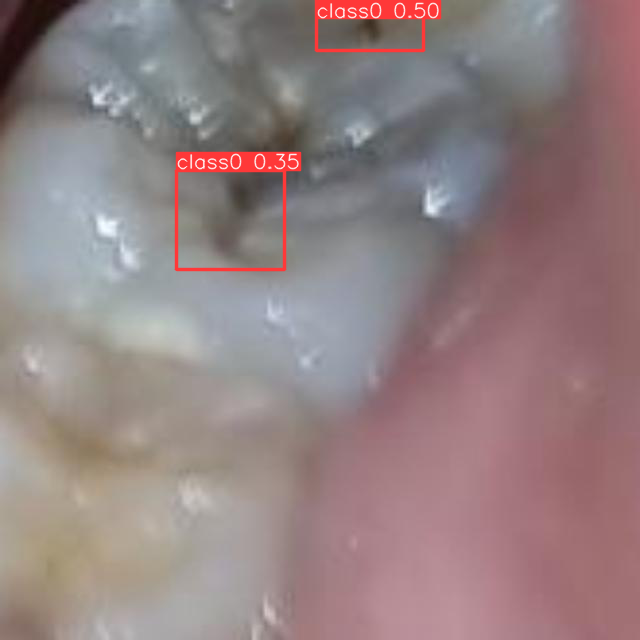

In [145]:
print(out2.__dir__())

# Выведем изображение на экран.
out2.show() 

In [146]:
print(type(out2.ims[0]))

<class 'numpy.ndarray'>


In [147]:
print(out2.pred)

[tensor([[3.16811e+02, 0.00000e+00, 4.23661e+02, 5.03779e+01, 4.99345e-01, 0.00000e+00],
        [1.76345e+02, 1.70216e+02, 2.84615e+02, 2.69597e+02, 3.45878e-01, 0.00000e+00]])]


In [148]:
print(out2.render)

<bound method Detections.render of YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 640x640 2 class0s
Speed: 6.0ms pre-process, 166.1ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)>


In [149]:
print(out2.ims[0].shape)

(640, 640, 3)


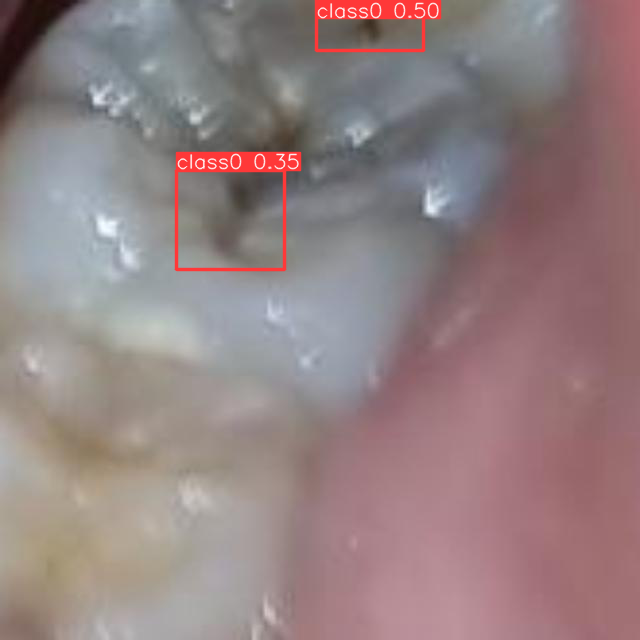

In [150]:
display(Image.fromarray(out2.ims[0]))